In [1]:
import pandas as pd
import seaborn as sns
import os
import glob

In [17]:
output_file_path = '../../../results/plots/wibea_marvinlinzen_model_overview.png'
files = glob.glob('results/results_wibea_MARVINLINZEN_by_clause/*wibea_seed100.txt')

In [5]:
dfs = []
for f in files:
    name = None
    parts = os.path.basename(f).split('_')
    if 'xlnet' in parts:
        name = '_'.join(parts[:2])
    else:
        name = parts[0].split('-')[0]

    currentdf = pd.read_csv(f)
    currentdf = currentdf.drop(['group'], axis=1).mean()
    dfs.append(currentdf.to_frame(name))
    
len(dfs)

bert
electra
gpt2
roberta
xlnet_bi
xlnet_uni


6

In [7]:
modeldf = pd.concat(dfs, axis=1)
modeldf = modeldf.sort_index(axis=1)
modeldf

,bert,electra,gpt2,roberta,xlnet_bi,xlnet_uni
1,0.395748,0.433741,0.365126,0.514371,0.392165,0.306041
2,0.429895,0.459755,0.351539,0.500959,0.438962,0.425972
3,0.434287,0.472750,0.371654,0.655480,0.460025,0.475481
4,0.436927,0.504704,0.370324,0.667320,0.504223,0.463451
5,0.476535,0.501978,0.360912,0.800407,0.585390,0.439146
6,0.502309,0.529328,0.447799,0.708131,0.592612,0.385696
7,0.611187,0.762632,0.429277,0.647160,0.518023,0.361061
8,0.742391,0.883911,0.342045,0.690235,0.475437,0.346684
9,0.843336,0.947781,0.378526,0.733605,0.468103,0.334405
10,0.816497,0.881173,0.314286,0.742938,0.476345,0.344330


[(0.0, 1.0)]

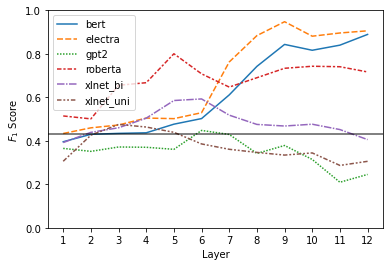

In [9]:
# plot
myplot = sns.lineplot(data=modeldf)
myplot.set_ylabel('$F_{1}$ Score')
myplot.set_xlabel('Layer')
myplot.axhline(0.43, color=(0, 0, 0, 0.65))
myplot.set(ylim=(0, 1))


In [18]:
fig = myplot.get_figure()
fig.savefig(output_file_path, bbox_inches="tight", dpi=300) 